## Preprocessing 

Let's analyze and cleanse the data with some preprocessing tasks before training our model.

In [87]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np

In [88]:
data = pd.read_csv('House Price India.csv')

In [89]:
data.head()

,id,Date,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,...,Built Year,Renovation Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price
0,6762810635,42491,4,2.50,2920,4000,1.5,0,0,5,...,1909,0,122004,52.8878,-114.470,2470,4000,2,51,1400000
1,6762810998,42491,5,2.75,2910,9480,1.5,0,0,3,...,1939,0,122004,52.8852,-114.468,2940,6600,1,53,1200000
2,6762812605,42491,4,2.50,3310,42998,2.0,0,0,3,...,2001,0,122005,52.9532,-114.321,3350,42847,3,76,838000
3,6762812919,42491,3,2.00,2710,4500,1.5,0,0,4,...,1929,0,122006,52.9047,-114.485,2060,4500,1,51,805000
4,6762813105,42491,3,2.50,2600,4750,1.0,0,0,4,...,1951,0,122007,52.9133,-114.590,2380,4750,1,67,790000


In [90]:
data.shape

(14619, 23)

In [91]:
data.dtypes

id                                         int64
Date                                       int64
number of bedrooms                         int64
number of bathrooms                      float64
living area                                int64
lot area                                   int64
number of floors                         float64
waterfront present                         int64
number of views                            int64
condition of the house                     int64
grade of the house                         int64
Area of the house(excluding basement)      int64
Area of the basement                       int64
Built Year                                 int64
Renovation Year                            int64
Postal Code                                int64
Lattitude                                float64
Longitude                                float64
living_area_renov                          int64
lot_area_renov                             int64
Number of schools ne

In [92]:
data.isnull().sum()

id                                       0
Date                                     0
number of bedrooms                       0
number of bathrooms                      0
living area                              0
lot area                                 0
number of floors                         0
waterfront present                       0
number of views                          0
condition of the house                   0
grade of the house                       0
Area of the house(excluding basement)    0
Area of the basement                     0
Built Year                               0
Renovation Year                          0
Postal Code                              0
Lattitude                                0
Longitude                                0
living_area_renov                        0
lot_area_renov                           0
Number of schools nearby                 0
Distance from the airport                0
Price                                    0
dtype: int6

#### Observations:

1. Data has 23 Columns and 14619 Rows.
2. Data has no `null` values.
3. None of the variables is an object.

### Modifying Columns

In [93]:
data_dict = {
    'number of bedrooms': 'bedroom_count',
    'number of bathrooms': 'bathroom_count',
    'living area': 'living_area',
    'lot area': 'lot_area',
    'number of floors': 'floor_count',
    'waterfront present': 'has_waterfront',
    'condition of the house': 'house_condition',
    'grade of the house': 'house_grade',
    'Area of the house(excluding basement)': 'house_area',
    'Area of the basement': 'basement_area',
    'Built Year': 'build_year',
    'Renovation Year': 'renovation_year',
    'Lattitude': 'latitude',
    'Longitude': 'longitude',
    # 'living_area_renov': '',
    # 'lot_area_renov': '',
    'Number of schools nearby': 'schools_nearby',
    'Distance from the airport': 'airport_distance',
    'Price': 'price'
}

data = data.drop(columns=['id', 'Date', 'number of views', 'Postal Code'])
data = data.rename(columns=data_dict)

### Outlier Treatment

In [94]:
def treat_outliers(dataset, col):

    seg = dataset[col]
    max_val = max(seg)

    q1, q3 = seg.quantile(0.25), seg.quantile(0.75)
    iqr = q3 - q1 

    upper_bound = q3 + 1.5 * iqr 
    lower_bound = q1 - 1.5 * iqr


    def treatment(val):
        if val > upper_bound: return upper_bound
        elif val < lower_bound: return lower_bound
        else: return val


    if max_val > upper_bound:
        print(f'[Y]: Outliers treated in {col}')
        dataset[col] = dataset[col].map(treatment)
    else:
        print(f'[N]: No outliers are present in {col}')

In [95]:
for col in data.columns:
    treat_outliers(data, col)

[Y]: Outliers treated in bedroom_count
[Y]: Outliers treated in bathroom_count
[Y]: Outliers treated in living_area
[Y]: Outliers treated in lot_area
[N]: No outliers are present in floor_count
[Y]: Outliers treated in has_waterfront
[N]: No outliers are present in house_condition
[Y]: Outliers treated in house_grade
[Y]: Outliers treated in house_area
[Y]: Outliers treated in basement_area
[N]: No outliers are present in build_year
[Y]: Outliers treated in renovation_year
[N]: No outliers are present in latitude
[Y]: Outliers treated in longitude
[Y]: Outliers treated in living_area_renov
[Y]: Outliers treated in lot_area_renov
[N]: No outliers are present in schools_nearby
[N]: No outliers are present in airport_distance
[Y]: Outliers treated in price


### Feature Engineering

In [96]:
data = data.drop(columns=['renovation_year'])
data['house_age'] = 2024 - data['build_year']

### Correlation Analysis

In [97]:
threshold = 0.8
high_correlation_pairs = []
correlation_matrix = data.corr()

for col in correlation_matrix.columns:
    for idx in correlation_matrix.index:
        if col != idx and abs(correlation_matrix.loc[idx, col]) > threshold:
            high_correlation_pairs.append((col, idx))
            

for pair in high_correlation_pairs:
    print(pair)

('living_area', 'house_area')
('lot_area', 'lot_area_renov')
('house_area', 'living_area')
('build_year', 'house_age')
('lot_area_renov', 'lot_area')
('house_age', 'build_year')


In [98]:
data = data.drop(columns=['lot_area_renov', 'living_area'])

### Fixing Skewness

<Axes: xlabel='price', ylabel='Count'>

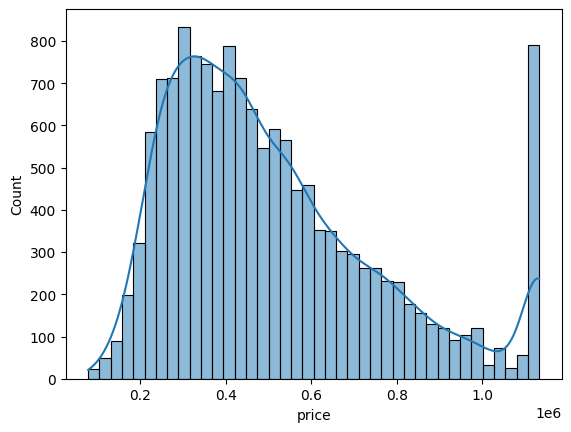

In [99]:
sns.histplot(data['price'], kde=True)

In [100]:
data.skew()

bedroom_count        0.231506
bathroom_count       0.029970
lot_area             0.855573
floor_count          0.586324
has_waterfront       0.000000
house_condition      1.018148
house_grade          0.265677
house_area           0.910064
basement_area        1.217036
build_year          -0.472187
latitude            -0.523730
longitude            0.672612
living_area_renov    0.784593
schools_nearby      -0.022522
airport_distance     0.005987
price                0.940920
house_age            0.472187
dtype: float64

In [101]:
for col in data.columns:
    data[col] = np.sqrt(np.abs(data[col]))
    print(f'[T]: sqrt transformed {col}')

[T]: sqrt transformed bedroom_count
[T]: sqrt transformed bathroom_count
[T]: sqrt transformed lot_area
[T]: sqrt transformed floor_count
[T]: sqrt transformed has_waterfront
[T]: sqrt transformed house_condition
[T]: sqrt transformed house_grade
[T]: sqrt transformed house_area
[T]: sqrt transformed basement_area
[T]: sqrt transformed build_year
[T]: sqrt transformed latitude
[T]: sqrt transformed longitude
[T]: sqrt transformed living_area_renov
[T]: sqrt transformed schools_nearby
[T]: sqrt transformed airport_distance
[T]: sqrt transformed price
[T]: sqrt transformed house_age


<Axes: xlabel='price', ylabel='Count'>

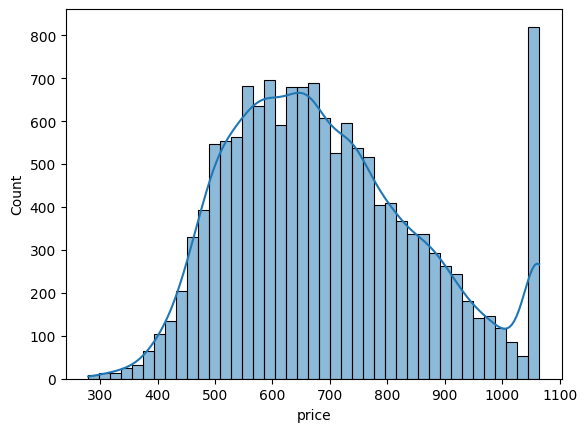

In [102]:
sns.histplot(data['price'], kde=True)

In [103]:
data.head()

,bedroom_count,bathroom_count,lot_area,floor_count,has_waterfront,house_condition,house_grade,house_area,basement_area,build_year,latitude,longitude,living_area_renov,schools_nearby,airport_distance,price,house_age
0,2.000000,1.581139,63.245553,1.224745,0.0,2.236068,2.828427,43.703547,31.780497,43.692105,7.272400,10.699065,49.699095,1.414214,7.141428,1064.189833,10.723805
1,2.236068,1.658312,97.365292,1.224745,0.0,1.732051,2.828427,53.944416,0.000000,44.034078,7.272221,10.698972,54.221767,1.000000,7.280110,1064.189833,9.219544
2,2.000000,1.581139,139.585995,1.414214,0.0,1.732051,3.000000,57.532599,0.000000,44.732538,7.276895,10.692100,57.879185,1.732051,8.717798,915.423399,4.795832
3,1.732051,1.414214,67.082039,1.224745,0.0,2.000000,2.828427,43.358967,28.809721,43.920383,7.273562,10.699766,45.387223,1.000000,7.141428,897.217922,9.746794
4,1.732051,1.581139,68.920244,1.000000,0.0,2.000000,3.000000,41.231056,30.000000,44.170126,7.274153,10.704672,48.785244,1.000000,8.185353,888.819442,8.544004


In [104]:
data.skew()

bedroom_count       -0.104027
bathroom_count      -0.315161
lot_area             0.216773
floor_count          0.382162
has_waterfront       0.000000
house_condition      0.785755
house_grade          0.135787
house_area           0.538934
basement_area        0.721972
build_year          -0.484664
latitude            -0.525894
longitude           -0.673858
living_area_renov    0.455085
schools_nearby      -0.181580
airport_distance    -0.077298
price                0.482973
house_age            0.004510
dtype: float64

## Final Conclusion

- There are no missing values 
- No variable is an object 
- Unuseful Columns Dropped
- All outliers are treated
- Removed highly correlated variables 
- Done Feature Engineering 
- Fixed Skewness to ensure Normal Distribution 

In [105]:
data.to_csv('house_price_data_cleaned.csv', index=False)

In [106]:
len(data.columns)

17